In [5]:
print('22 paskaita')

22 paskaita


In [16]:
# Terminale įvykdau komandą:
# /bin/python3 -m pip install mysql-connector-python=8.0.29 --break-system-packages

In [5]:
# import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [11]:
def pout(a, limit=5):
    if len(a) > limit:
        print(f'Rodoma {limit} eilutės iš {len(a)}')
    for k,i in enumerate(a):
        if k > limit-1:
            break
        l = []
        for n in i:
            f = f'{str(n):^16.16}'
            l.append(f)
        t = f'|{k:^3}|'+'|'.join(l)+'|'
        print(t)

In [9]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [20]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""paste SQL command here!"""
C.execute(sql)
ans = C.fetchall()
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių

sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""

C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


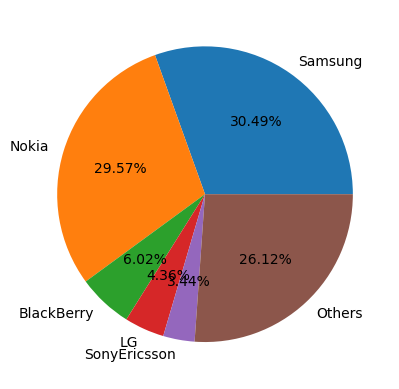

In [13]:
fig, axis = plt.subplots()
axis.pie(kiekiai, labels=gamintojai, autopct='%.2f%%')
plt.show()

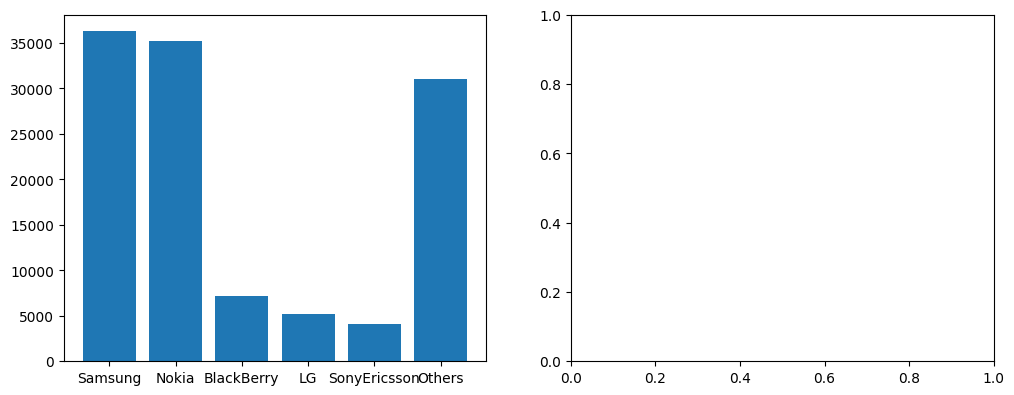

In [15]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)

plt.show()